In [1]:
import pandas as pd

weather = pd.read_csv("openmeteo_weather.csv")

air = pd.read_csv("openmeteo_air_quality.csv")

weather["date"] = pd.to_datetime(weather["date"])
air["date"] = pd.to_datetime(air["date"])

df = weather.merge(air, on="date", how="inner")

df.head()


FileNotFoundError: [Errno 2] No such file or directory: 'openmeteo_weather.csv'

In [ ]:
df.isna().sum()

In [ ]:
df = df.dropna()
df.head()

In [2]:
df.shape


(234, 11)

In [3]:
df.isna().sum()

,0
date,0
temperature,0
humidity,0
wind_speed,0
rain,0
pressure,0
pm25,0
pm10,0
no2,0
o3,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234 entries, 0 to 233
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         234 non-null    datetime64[ns]
 1   temperature  234 non-null    float64       
 2   humidity     234 non-null    int64         
 3   wind_speed   234 non-null    float64       
 4   rain         234 non-null    float64       
 5   pressure     234 non-null    float64       
 6   pm25         234 non-null    float64       
 7   pm10         234 non-null    float64       
 8   no2          234 non-null    float64       
 9   o3           234 non-null    float64       
 10  so2          234 non-null    float64       
dtypes: datetime64[ns](1), float64(9), int64(1)
memory usage: 20.2 KB


# Feature Engineering


In [17]:
df["day"] = df["date"].dt.day
df["month"] = df["date"].dt.month
df["dayofweek"] = df["date"].dt.dayofweek


In [ ]:
df.head()

,date,temperature,humidity,wind_speed,rain,pressure,pm25,pm10,no2,o3,so2,day,month,dayofweek
0,2025-06-01,31.9,66,15.2,0.0,997.0,36.875000,144.558333,10.033333,81.250000,9.575000,1,6,6
1,2025-06-02,30.5,75,15.6,0.0,996.9,44.220833,191.754167,8.750000,83.833333,10.162500,2,6,0
2,2025-06-03,29.8,80,15.0,0.0,998.8,31.029167,89.879167,8.750000,83.833333,9.625000,3,6,1
3,2025-06-04,30.2,72,15.2,0.1,1001.9,27.254167,81.533333,8.816667,72.083333,11.304167,4,6,2
4,2025-06-05,30.3,69,12.7,0.0,1005.8,24.704167,73.608333,9.150000,67.791667,12.150000,5,6,3


COMPUTE AQI FROM PM2.5

In [18]:
def pm25_to_aqi(pm):
    if pm <= 12:
        return (50/12)*pm
    elif pm <= 35.4:
        return 50 + (pm-12)*(50/23.4)
    elif pm <= 55.4:
        return 100 + (pm-35.4)*(50/20)
    elif pm <= 150.4:
        return 150 + (pm-55.4)*(100/95)
    else:
        return 300

df["aqi"] = df["pm25"].apply(pm25_to_aqi)


In [19]:
df['aqi'].head()

,aqi
0,103.687500
1,122.052083
2,90.660613
3,82.594373
4,77.145655


Add Lag Features

In [20]:
df["aqi_lag_1"] = df["aqi"].shift(1)
df["aqi_lag_2"] = df["aqi"].shift(2)
df["aqi_lag_3"] = df["aqi"].shift(3)


In [21]:
df.head()

,date,temperature,humidity,wind_speed,rain,pressure,pm25,pm10,no2,o3,so2,day,month,dayofweek,aqi,aqi_lag_1,aqi_lag_2,aqi_lag_3
0,2025-06-01,31.9,66,15.2,0.0,997.0,36.875000,144.558333,10.033333,81.250000,9.575000,1,6,6,103.687500,NaN,NaN,NaN
1,2025-06-02,30.5,75,15.6,0.0,996.9,44.220833,191.754167,8.750000,83.833333,10.162500,2,6,0,122.052083,103.687500,NaN,NaN
2,2025-06-03,29.8,80,15.0,0.0,998.8,31.029167,89.879167,8.750000,83.833333,9.625000,3,6,1,90.660613,122.052083,103.687500,NaN
3,2025-06-04,30.2,72,15.2,0.1,1001.9,27.254167,81.533333,8.816667,72.083333,11.304167,4,6,2,82.594373,90.660613,122.052083,103.687500
4,2025-06-05,30.3,69,12.7,0.0,1005.8,24.704167,73.608333,9.150000,67.791667,12.150000,5,6,3,77.145655,82.594373,90.660613,122.052083


AQI Change Rate

In [22]:
df = df.sort_values("date")

df["aqi_change_rate"] = df["aqi"] - df["aqi"].shift(1)


In [23]:
df["aqi_change_rate_3d"] = df["aqi"] - df["aqi"].shift(3)


In [24]:
df.head()

,date,temperature,humidity,wind_speed,rain,pressure,pm25,pm10,no2,o3,so2,day,month,dayofweek,aqi,aqi_lag_1,aqi_lag_2,aqi_lag_3,aqi_change_rate,aqi_change_rate_3d
0,2025-06-01,31.9,66,15.2,0.0,997.0,36.875000,144.558333,10.033333,81.250000,9.575000,1,6,6,103.687500,NaN,NaN,NaN,NaN,NaN
1,2025-06-02,30.5,75,15.6,0.0,996.9,44.220833,191.754167,8.750000,83.833333,10.162500,2,6,0,122.052083,103.687500,NaN,NaN,18.364583,NaN
2,2025-06-03,29.8,80,15.0,0.0,998.8,31.029167,89.879167,8.750000,83.833333,9.625000,3,6,1,90.660613,122.052083,103.687500,NaN,-31.391471,NaN
3,2025-06-04,30.2,72,15.2,0.1,1001.9,27.254167,81.533333,8.816667,72.083333,11.304167,4,6,2,82.594373,90.660613,122.052083,103.687500,-8.066239,-21.093127
4,2025-06-05,30.3,69,12.7,0.0,1005.8,24.704167,73.608333,9.150000,67.791667,12.150000,5,6,3,77.145655,82.594373,90.660613,122.052083,-5.448718,-44.906428


### Add Rolling Average AQI

In [25]:
df["aqi_rolling_avg_3d"] = df["aqi"].rolling(3).mean()
df.head()

,date,temperature,humidity,wind_speed,rain,pressure,pm25,pm10,no2,o3,...,day,month,dayofweek,aqi,aqi_lag_1,aqi_lag_2,aqi_lag_3,aqi_change_rate,aqi_change_rate_3d,aqi_rolling_avg_3d
0,2025-06-01,31.9,66,15.2,0.0,997.0,36.875000,144.558333,10.033333,81.250000,...,1,6,6,103.687500,NaN,NaN,NaN,NaN,NaN,NaN
1,2025-06-02,30.5,75,15.6,0.0,996.9,44.220833,191.754167,8.750000,83.833333,...,2,6,0,122.052083,103.687500,NaN,NaN,18.364583,NaN,NaN
2,2025-06-03,29.8,80,15.0,0.0,998.8,31.029167,89.879167,8.750000,83.833333,...,3,6,1,90.660613,122.052083,103.687500,NaN,-31.391471,NaN,105.466732
3,2025-06-04,30.2,72,15.2,0.1,1001.9,27.254167,81.533333,8.816667,72.083333,...,4,6,2,82.594373,90.660613,122.052083,103.687500,-8.066239,-21.093127,98.435690
4,2025-06-05,30.3,69,12.7,0.0,1005.8,24.704167,73.608333,9.150000,67.791667,...,5,6,3,77.145655,82.594373,90.660613,122.052083,-5.448718,-44.906428,83.466880


In [26]:
df.isna().sum()

,0
date,0
temperature,0
humidity,0
wind_speed,0
rain,0
pressure,0
pm25,0
pm10,0
no2,0
o3,0


In [27]:
df = df.dropna()

In [28]:
df.head()

,date,temperature,humidity,wind_speed,rain,pressure,pm25,pm10,no2,o3,...,day,month,dayofweek,aqi,aqi_lag_1,aqi_lag_2,aqi_lag_3,aqi_change_rate,aqi_change_rate_3d,aqi_rolling_avg_3d
3,2025-06-04,30.2,72,15.2,0.1,1001.9,27.254167,81.533333,8.816667,72.083333,...,4,6,2,82.594373,90.660613,122.052083,103.687500,-8.066239,-21.093127,98.435690
4,2025-06-05,30.3,69,12.7,0.0,1005.8,24.704167,73.608333,9.150000,67.791667,...,5,6,3,77.145655,82.594373,90.660613,122.052083,-5.448718,-44.906428,83.466880
5,2025-06-06,30.3,68,14.9,0.0,1007.0,25.487500,65.962500,8.291667,70.250000,...,6,6,4,78.819444,77.145655,82.594373,90.660613,1.673789,-11.841168,79.519824
6,2025-06-07,30.0,71,17.1,0.0,1006.3,23.320833,62.908333,7.533333,71.333333,...,7,6,5,74.189815,78.819444,77.145655,82.594373,-4.629630,-8.404558,76.718305
7,2025-06-08,30.0,70,16.6,0.0,1005.8,22.562500,53.975000,8.062500,75.750000,...,8,6,6,72.569444,74.189815,78.819444,77.145655,-1.620370,-4.576211,75.192901


# Visualization

1. AQI Trend Over Time

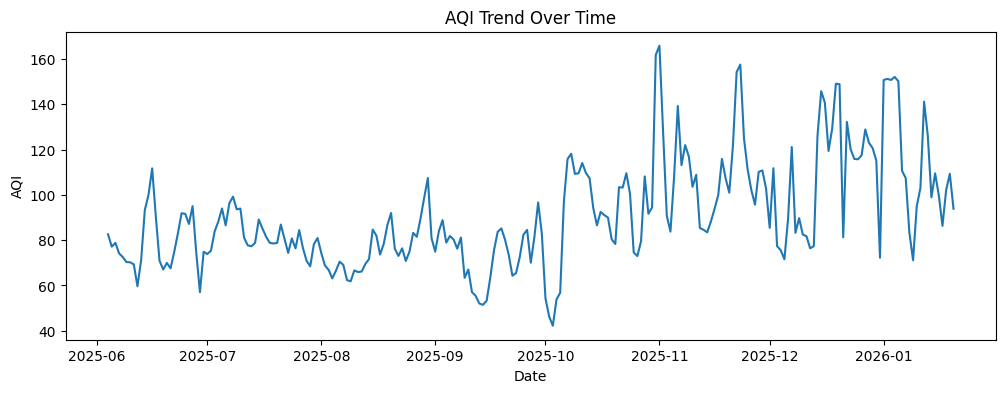

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,4))
plt.plot(df["date"], df["aqi"])
plt.title("AQI Trend Over Time")
plt.xlabel("Date")
plt.ylabel("AQI")
plt.show()


AQI shows temporal variability with seasonal trends.

2. AQI Distribution

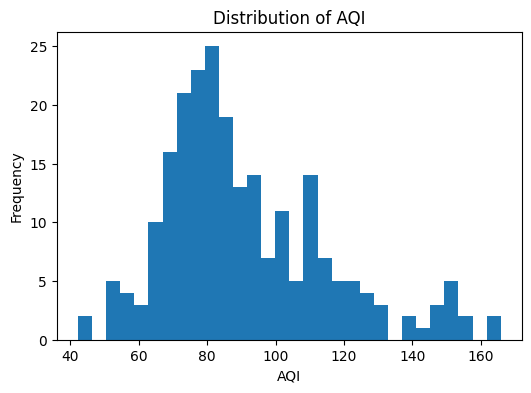

In [ ]:
plt.figure(figsize=(6,4))
plt.hist(df["aqi"], bins=30)
plt.title("Distribution of AQI")
plt.xlabel("AQI")
plt.ylabel("Frequency")
plt.show()


3. AQI Change Rate Over Time

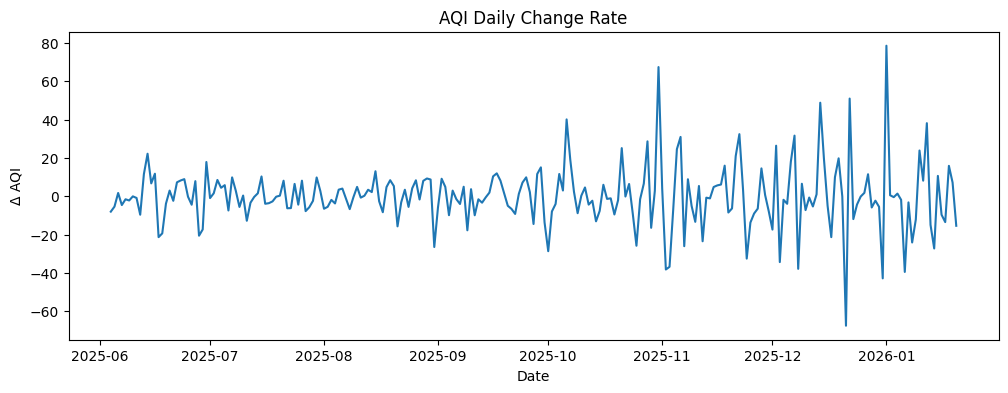

In [ ]:
plt.figure(figsize=(12,4))
plt.plot(df["date"], df["aqi_change_rate"])
plt.title("AQI Daily Change Rate")
plt.xlabel("Date")
plt.ylabel("Δ AQI")
plt.show()


4️. AQI vs PM2.5

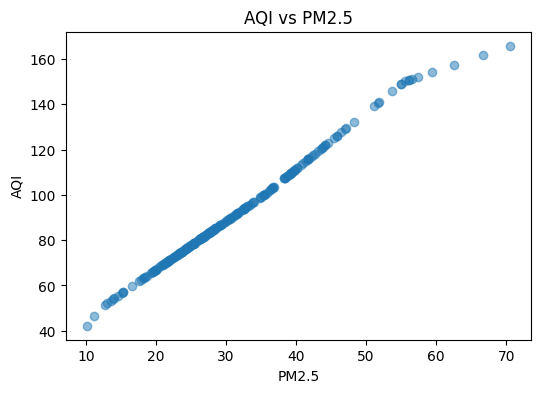

In [ ]:
plt.figure(figsize=(6,4))
plt.scatter(df["pm25"], df["aqi"], alpha=0.5)
plt.xlabel("PM2.5")
plt.ylabel("AQI")
plt.title("AQI vs PM2.5")
plt.show()


5️. AQI vs Temperature

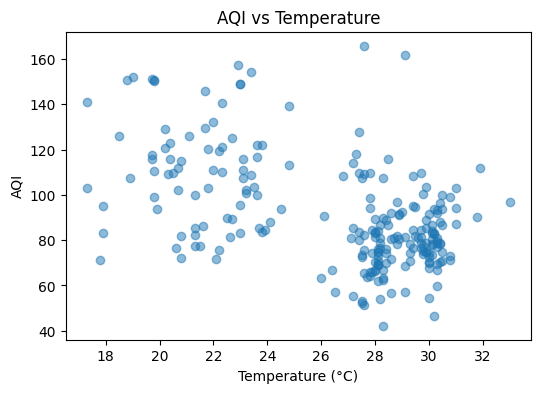

In [ ]:
plt.figure(figsize=(6,4))
plt.scatter(df["temperature"], df["aqi"], alpha=0.5)
plt.xlabel("Temperature (°C)")
plt.ylabel("AQI")
plt.title("AQI vs Temperature")
plt.show()


6️. AQI vs Humidity

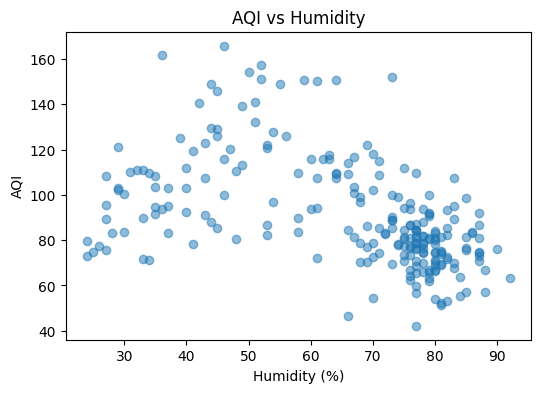

In [ ]:
plt.figure(figsize=(6,4))
plt.scatter(df["humidity"], df["aqi"], alpha=0.5)
plt.xlabel("Humidity (%)")
plt.ylabel("AQI")
plt.title("AQI vs Humidity")
plt.show()


7️. AQI vs Wind Speed

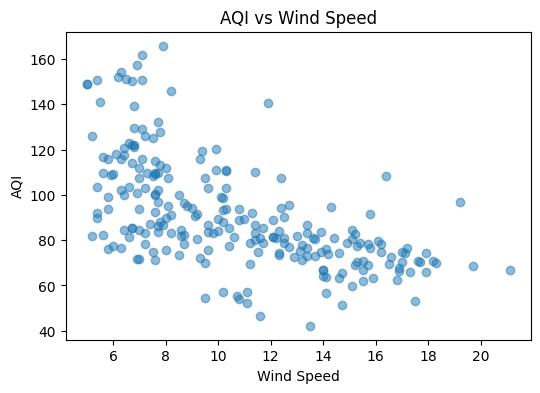

In [ ]:
plt.figure(figsize=(6,4))
plt.scatter(df["wind_speed"], df["aqi"], alpha=0.5)
plt.xlabel("Wind Speed")
plt.ylabel("AQI")
plt.title("AQI vs Wind Speed")
plt.show()


8️. Monthly Average AQI

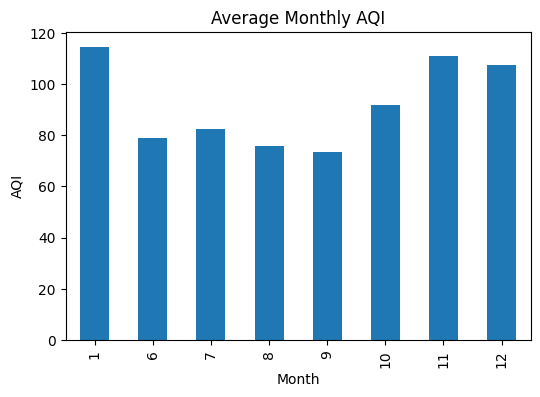

In [ ]:
monthly_aqi = df.groupby("month")["aqi"].mean()

plt.figure(figsize=(6,4))
monthly_aqi.plot(kind="bar")
plt.title("Average Monthly AQI")
plt.xlabel("Month")
plt.ylabel("AQI")
plt.show()


9. Day-of-Week AQI Pattern

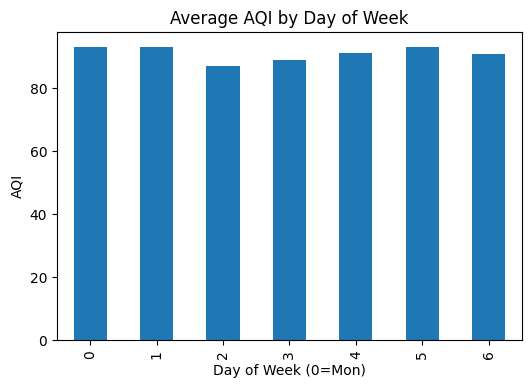

In [ ]:
dow_aqi = df.groupby("dayofweek")["aqi"].mean()

plt.figure(figsize=(6,4))
dow_aqi.plot(kind="bar")
plt.title("Average AQI by Day of Week")
plt.xlabel("Day of Week (0=Mon)")
plt.ylabel("AQI")
plt.show()


10. Correlation Heatmap

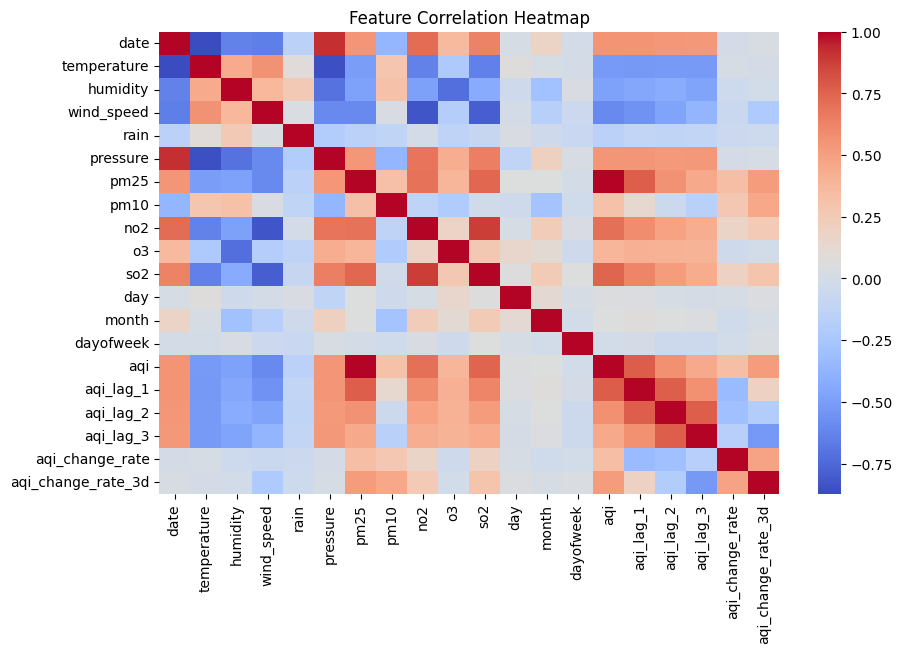

In [ ]:
import seaborn as sns

plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()


In [29]:
df.to_csv("aqi_features_v1.csv", index=False)
